<a href="https://colab.research.google.com/github/Siddhant254/Deep-Learning-Concepts/blob/master/Forward_Propogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


(200, 2) (200,)


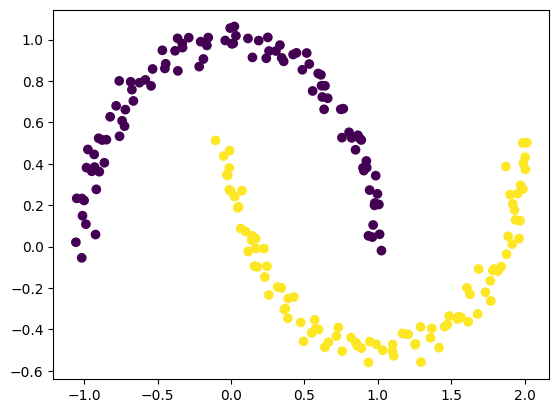

In [10]:
# creating moons dataset
from sklearn.datasets import make_moons
np.random.seed(0)
data,labels = make_moons(n_samples=200,noise=0.04,random_state=0)
print(data.shape,labels.shape)

plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

In [14]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape)

(150, 2) (50, 2)


In [32]:
# Feed Forward network class

class FeedForwardNetwork:

  def __init__(self):
    np.random.seed(0)
    # Initializing with random values of weights and biases with value 0
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0


  def sigmoid(self,x):
    return 1/(1+ np.exp(-x))

  def forward_pass(self,x):
    self.x1 , self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1   # First Neuron in first layer
    self.h1 = self.sigmoid(self.a1) # Passing through activation function of first neuron in first layer
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2  # Second neuron in first layer
    self.h2 = self.sigmoid(self.a2) # Passing through activation function of second neuron in first layer
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3  # Output neuron
    self.h3 = self.sigmoid(self.a3) # Passing through activation function of output layer
    forward_matrix = np.array([[0,0,0,0,self.h3,0,0,0],[0,0,(self.w5*self.h1),(self.w6*self.h2),self.b3,self.a3,0,0],[0,0,0,self.h1,0,0,0,self.h2],
                      [(self.w1*self.x1), (self.w2*self.x2),self.b1, self.a1,(self.w3*self.x1),(self.w4*self.x2),self.b2,self.a2]])
    forward_matrices.append(forward_matrix)
    return self.h3

In [33]:
forward_matrices = []
ffn = FeedForwardNetwork()

for x in X_train:
  ffn.forward_pass(x)

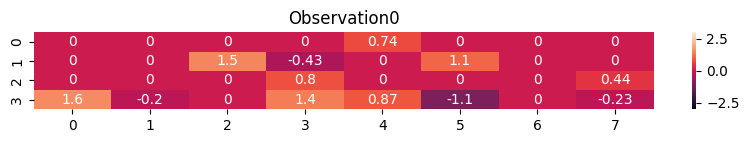

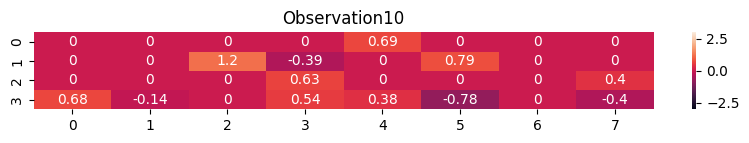

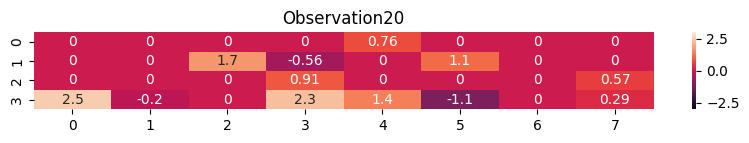

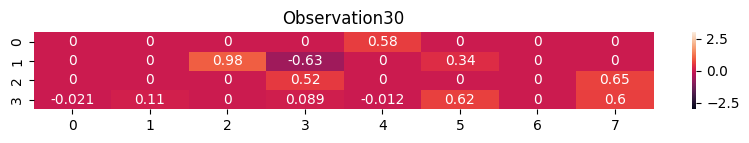

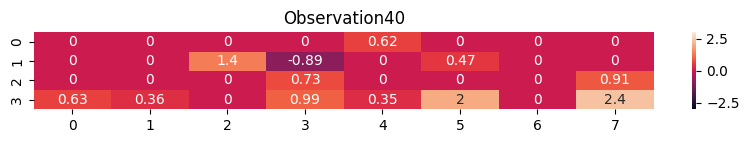

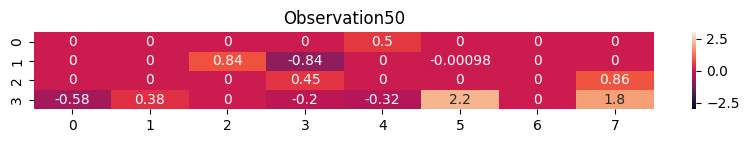

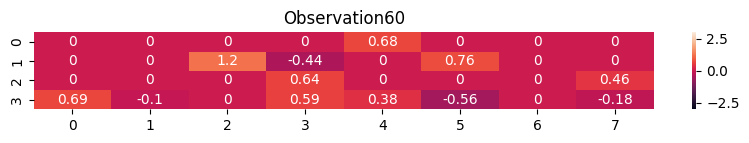

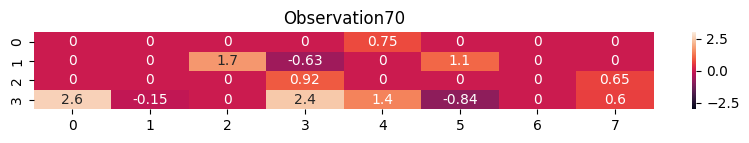

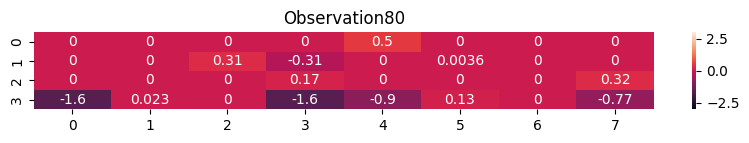

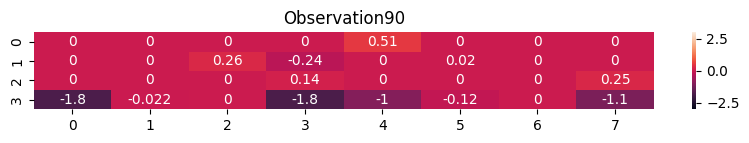

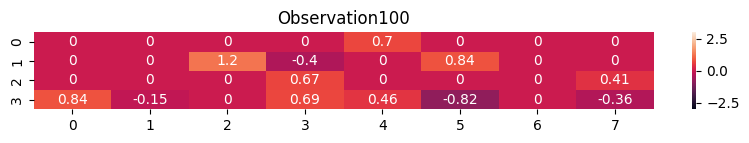

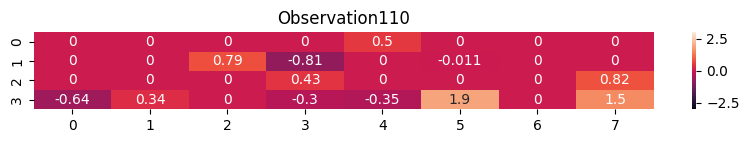

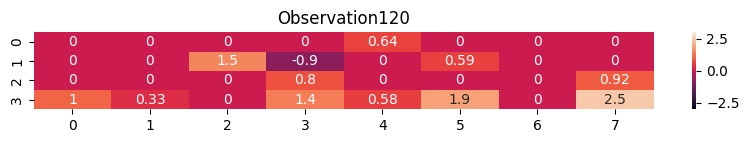

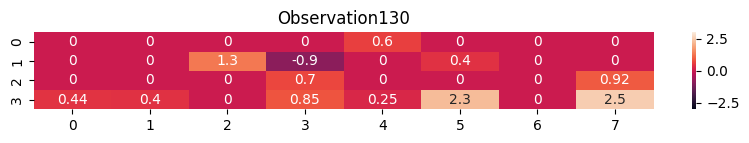

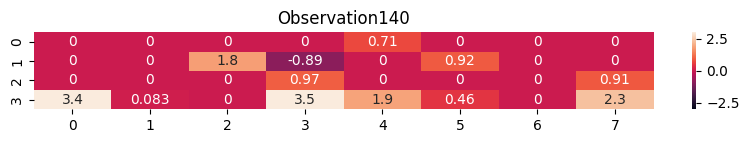

In [34]:
import seaborn as sns
import imageio
from IPython.display import HTML
def plot_heat_map(observation):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(forward_matrices[observation], annot=True,vmin=-3,vmax=3)
    plt.title("Observation"+str(observation))
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image
imageio.mimsave('./forwardpropagation_viz.gif', [plot_heat_map(i) for i in range(0,len(forward_matrices),len(forward_matrices)//15)], fps=1)